# Webtask Demo: Google Search

This notebook demonstrates automated Google search using Webtask with low-level imperative control.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .

Obtaining file:///home/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pywebtask (pyproject.toml) ... done
  Created wheel for pywebtask: filename=pywebtask-0.8.4-0.editable-py3-none-any.whl size=4588 sha256=fd9cbfe6b3be255c8ef983a54ab9e15405fd1a1624d16c83b191570e5cc03f09
  Stored in directory: /tmp/pip-ephem-wheel-cache-sdtk9bi0/wheels/92/a7/c0/4dbc45136057c0034fb6a0b9b932b4e284b6c17ca90a12ba46
Successfully built pywebtask
  Attempting uninstall: pywebtask
    Found existing installation: pywebtask 0.8.4
    Uninstalling pywebtask-0.8.4:
      Successfully uninstalled pywebtask-0.8.4

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure two LLMs:
- **gemini-2.5-flash**: For agent reasoning and task planning
- **gemini-2.5-flash-lite**: For element selection (faster and cheaper)

In [3]:
from webtask import Webtask
from webtask.integrations.llm.google import GeminiLLM

wt = Webtask()

# GeminiLLM will automatically read GOOGLE_API_KEY from environment
# Use powerful model for agent reasoning
agent_llm = GeminiLLM.create(model="gemini-2.5-flash", temperature=0.3)

# Use fast/cheap model for element selection
selector_llm = GeminiLLM.create(model="gemini-2.5-flash-lite", temperature=0.3)

/home/stevewang/Github/web-auto/webtask/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent with separate LLMs for reasoning and selection
agent = await wt.create_agent(
    llm=agent_llm, 
    selector_llm=selector_llm,
)

## 3. Navigate to Google

Navigate to Google's homepage.

In [5]:
await agent.navigate("google.com")

## 4. Search Query

Type the search query into the input field.

In [6]:
input_field = await agent.select("google search input")

In [7]:
await input_field.type("what is the capital of france?")
await agent.wait(2)

## 5. Final Results

Capture the search results page.

Search Results:


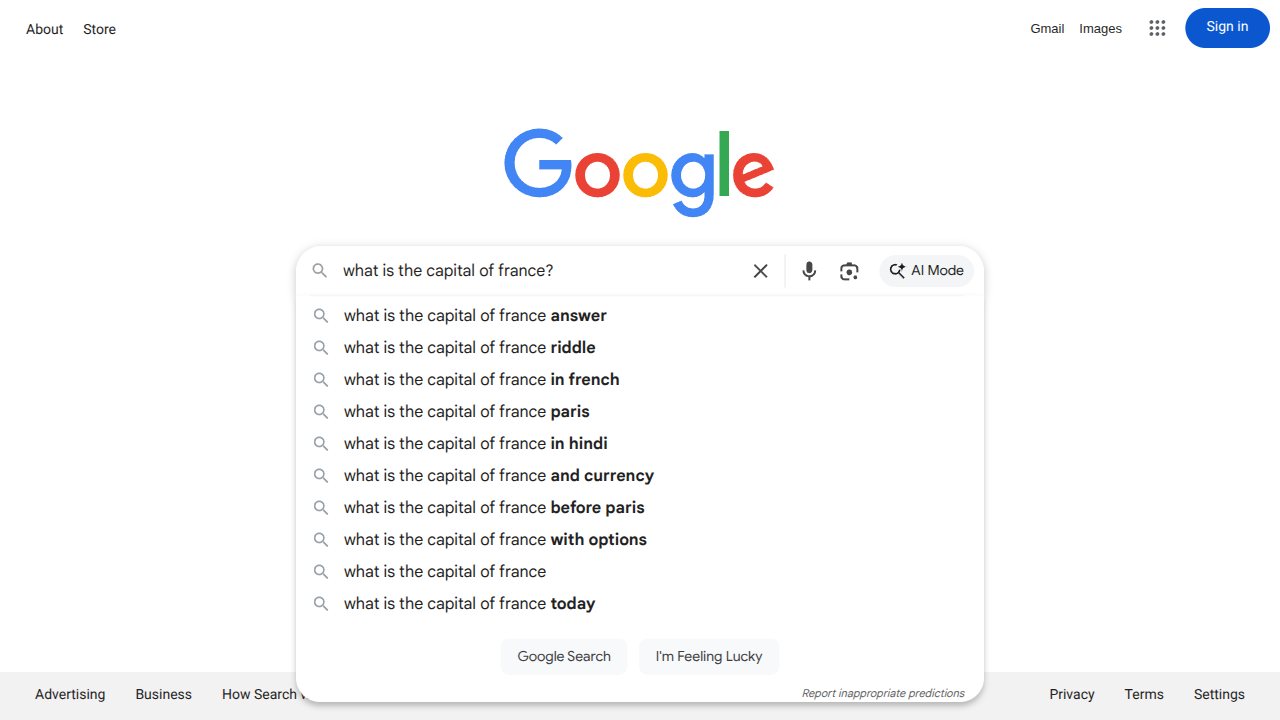

In [8]:
# Take screenshot of search results
print("Search Results:")
await agent.screenshot("search_results.png")
display(Image(filename="search_results.png", width=800))